# Functions

# CCLE mRNA expression dataset

In [1]:
# load in data

import pandas as pd
import pickle

# import GDSC2 drug response data using pickle

with open('data/drug-response/GDSC2/cache_gdsc2.pkl', 'rb') as f:
    gdsc2 = pickle.load(f)
    gdsc2_info = pickle.load(f)

# import CCLE gene expression data using pickle

with open('data/gene-expression/CCLE_Public_22Q2/ccle_expression.pkl', 'rb') as f:
    gene_entrez = pickle.load(f)
    ccle = pickle.load(f)

# import CCLE sample info data using pickle

with open('data/gene-expression/CCLE_Public_22Q2/ccle_sample_info.pkl', 'rb') as f:
    ccle_sample_info = pickle.load(f)


In [2]:
ccle.head()

,CELLLINE,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,H3C2,H3C3,AC098582.1,DUS4L-BCAP29,C8orf44-SGK3,ELOA3B,NPBWR1,ELOA3D,ELOA3,CDR1
0,ACH-001113,4.331992,0.000000,7.364397,2.792855,4.470537,0.028569,1.226509,3.042644,6.499686,...,2.689299,0.189034,0.201634,2.130931,0.555816,0.0,0.275007,0.0,0.0,0.000000
1,ACH-001289,4.566815,0.584963,7.106537,2.543496,3.504620,0.000000,0.189034,3.813525,4.221104,...,1.286881,1.049631,0.321928,1.464668,0.632268,0.0,0.014355,0.0,0.0,0.000000
2,ACH-001339,3.150560,0.000000,7.379032,2.333424,4.227279,0.056584,1.310340,6.687061,3.682573,...,0.594549,1.097611,0.831877,2.946731,0.475085,0.0,0.084064,0.0,0.0,0.042644
3,ACH-001538,5.085340,0.000000,7.154109,2.545968,3.084064,0.000000,5.868143,6.165309,4.489928,...,0.214125,0.632268,0.298658,1.641546,0.443607,0.0,0.028569,0.0,0.0,0.000000
4,ACH-000242,6.729145,0.000000,6.537607,2.456806,3.867896,0.799087,7.208381,5.569856,7.127014,...,1.117695,2.358959,0.084064,1.910733,0.000000,0.0,0.464668,0.0,0.0,0.000000


In [13]:
# randomly selected 10 columns from ccle
import numpy as np
# generate 10 random integers between 0 and len(ccle.columns)
random_cols = np.random.randint(0, len(ccle.columns), 10)

In [6]:
CDK4_example = ccle.loc[:, 'CDK4']

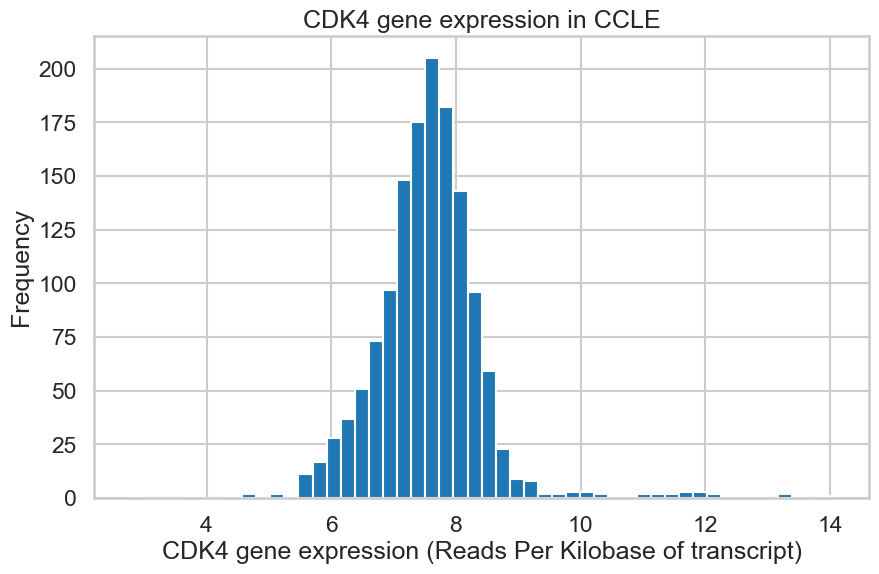

In [11]:
# plot CDK4 gene expression as a histogram

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(10, 6))
plt.hist(CDK4_example, bins=50)
plt.xlabel('CDK4 gene expression (Reads Per Kilobase of transcript)')
plt.ylabel('Frequency')
plt.title('CDK4 gene expression in CCLE')
plt.show()


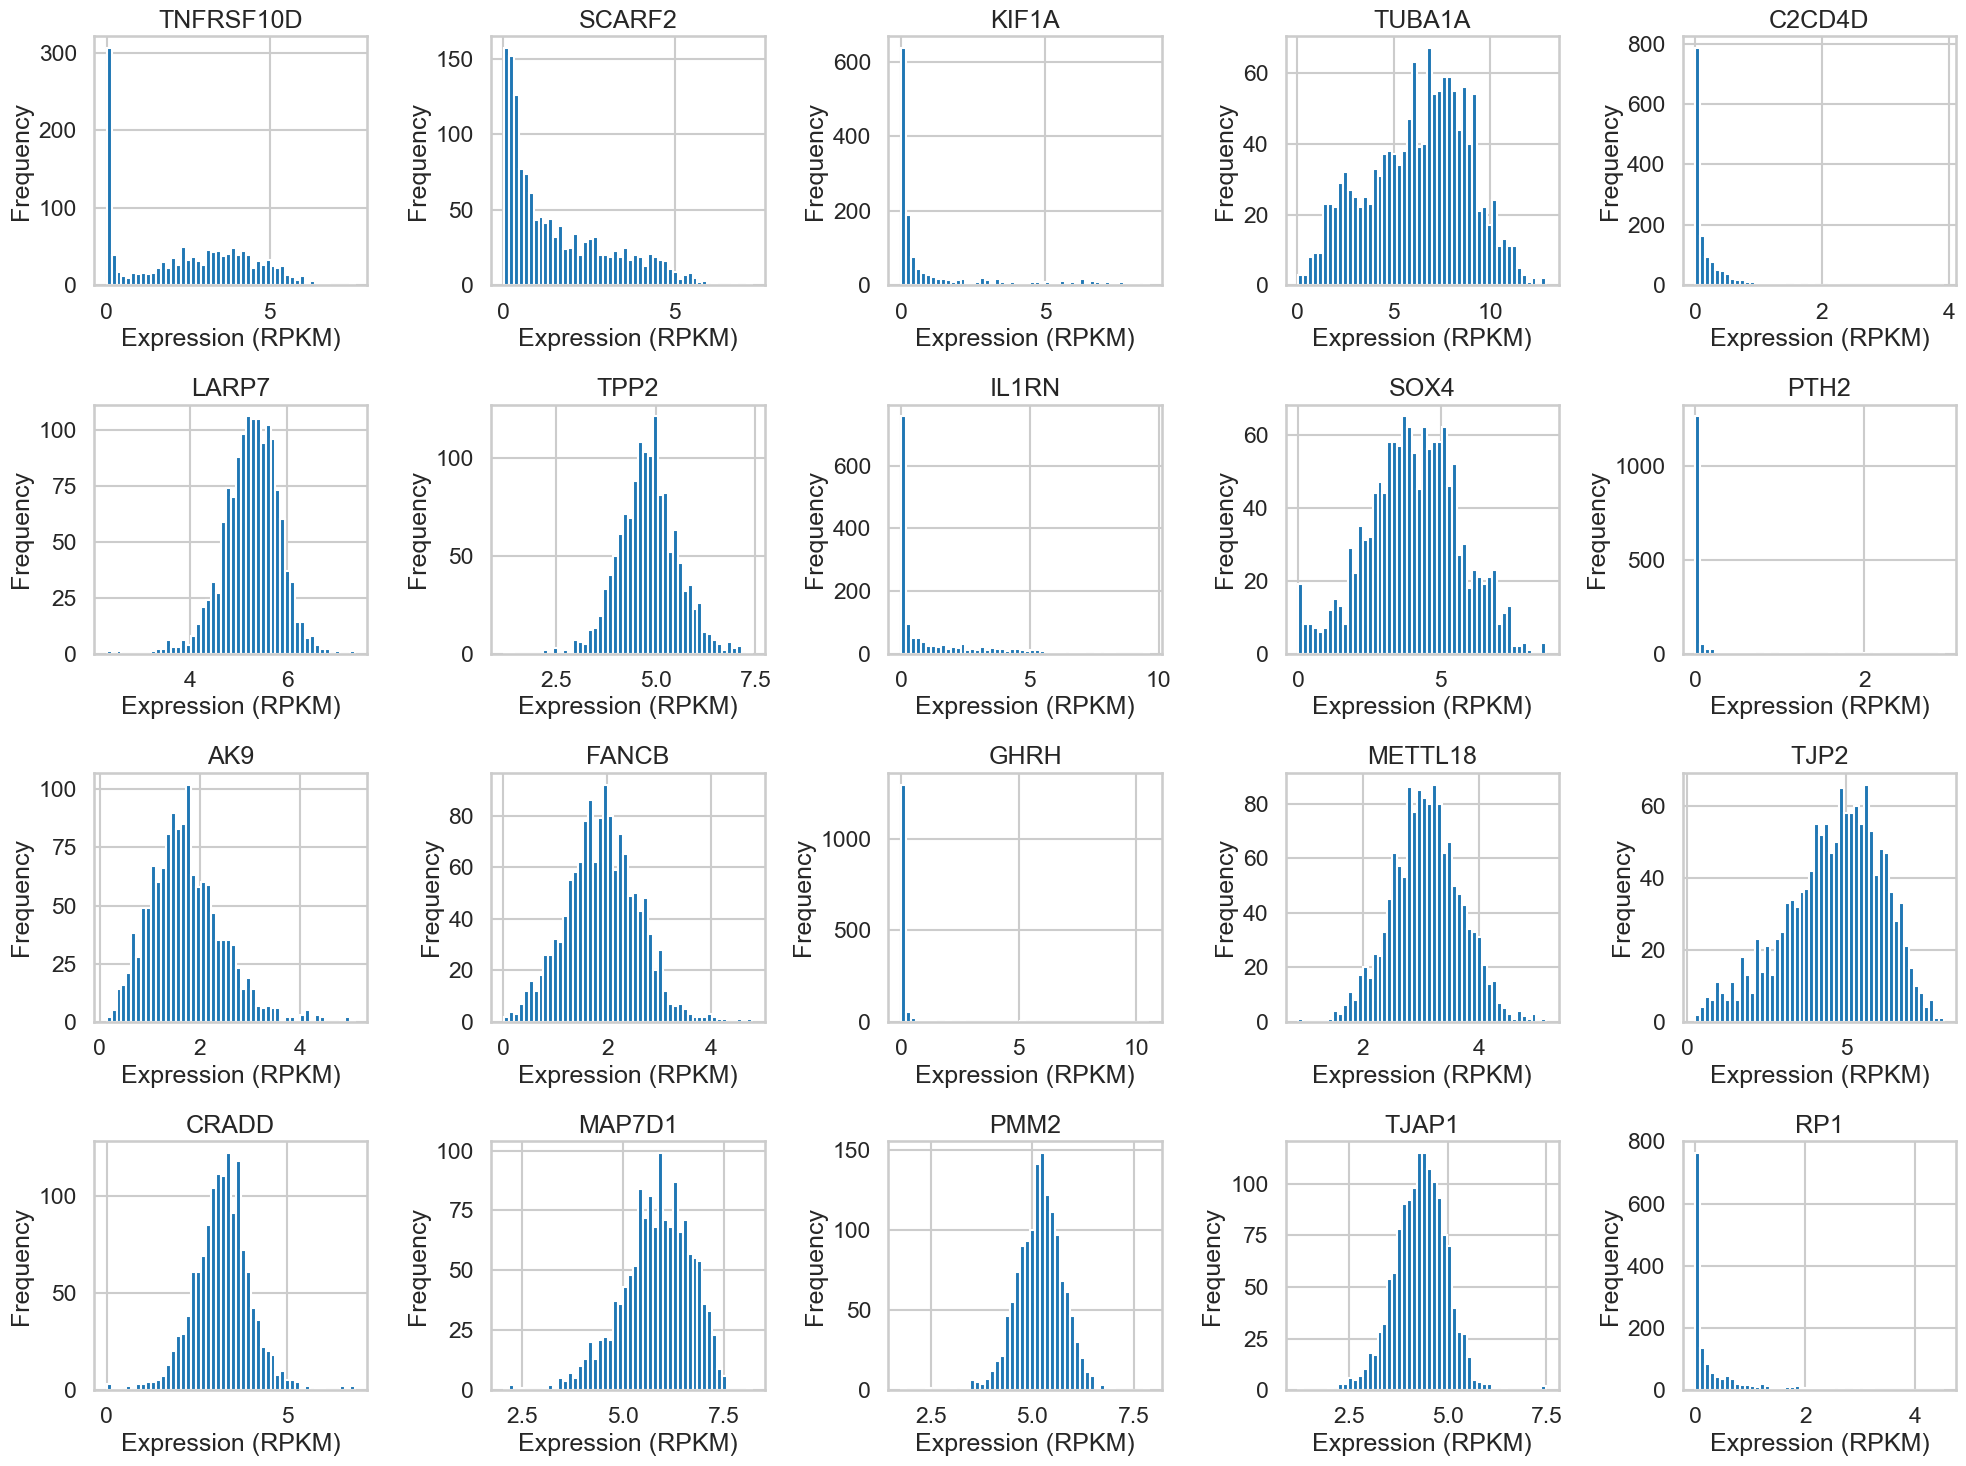

In [14]:
import numpy as np
# generate 10 random integers between 0 and len(ccle.columns)
random_cols = np.random.randint(0, len(ccle.columns), 20)

# plot 20 random genes as histograms, 4 rows, 5 columns

fig, axes = plt.subplots(4, 5, figsize=(20, 15))
for i, ax in enumerate(axes.flatten()):
    ax.hist(ccle.iloc[:, random_cols[i]], bins=50)
    ax.set_title(ccle.columns[random_cols[i]])
    ax.set_xlabel('Expression (RPKM)')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()



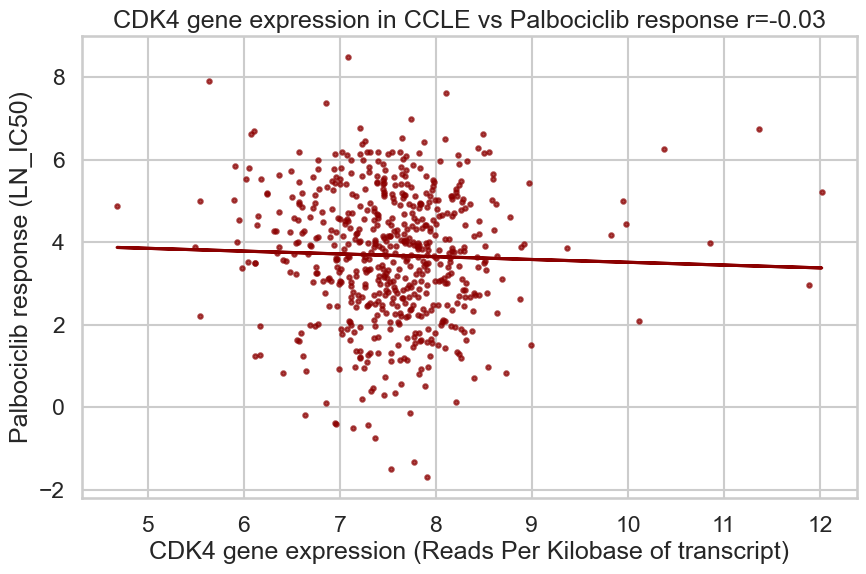

In [11]:
# correlate cdk4 expression with drug response

import DataFunctions as dd 

# import external libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# create a joint dataframe of cdk4 expression and drug response for palbociclib
palbociclib_df = dd.create_joint_dataset_from_ccle_gdsc2('Palbociclib', gdsc2, ccle, ccle_sample_info)

# plot correlation between cdk4 expression and palbociclib response

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(10, 6))
plt.scatter(palbociclib_df['CDK4'], palbociclib_df['LN_IC50'], color='darkred', alpha=0.7, s=10)
# create line of best fit
m, b = np.polyfit(palbociclib_df['CDK4'], palbociclib_df['LN_IC50'], 1)
plt.plot(palbociclib_df['CDK4'], m*palbociclib_df['CDK4'] + b, color='darkred')
# show correlation coefficient in the title
corr = str(round(np.corrcoef(palbociclib_df['CDK4'], palbociclib_df['LN_IC50'])[0, 1], 2))
plt.xlabel('CDK4 gene expression (Reads Per Kilobase of transcript)')
plt.ylabel('Palbociclib response (LN_IC50)')
plt.title(f'CDK4 gene expression in CCLE vs Palbociclib response r={corr}')
plt.show()

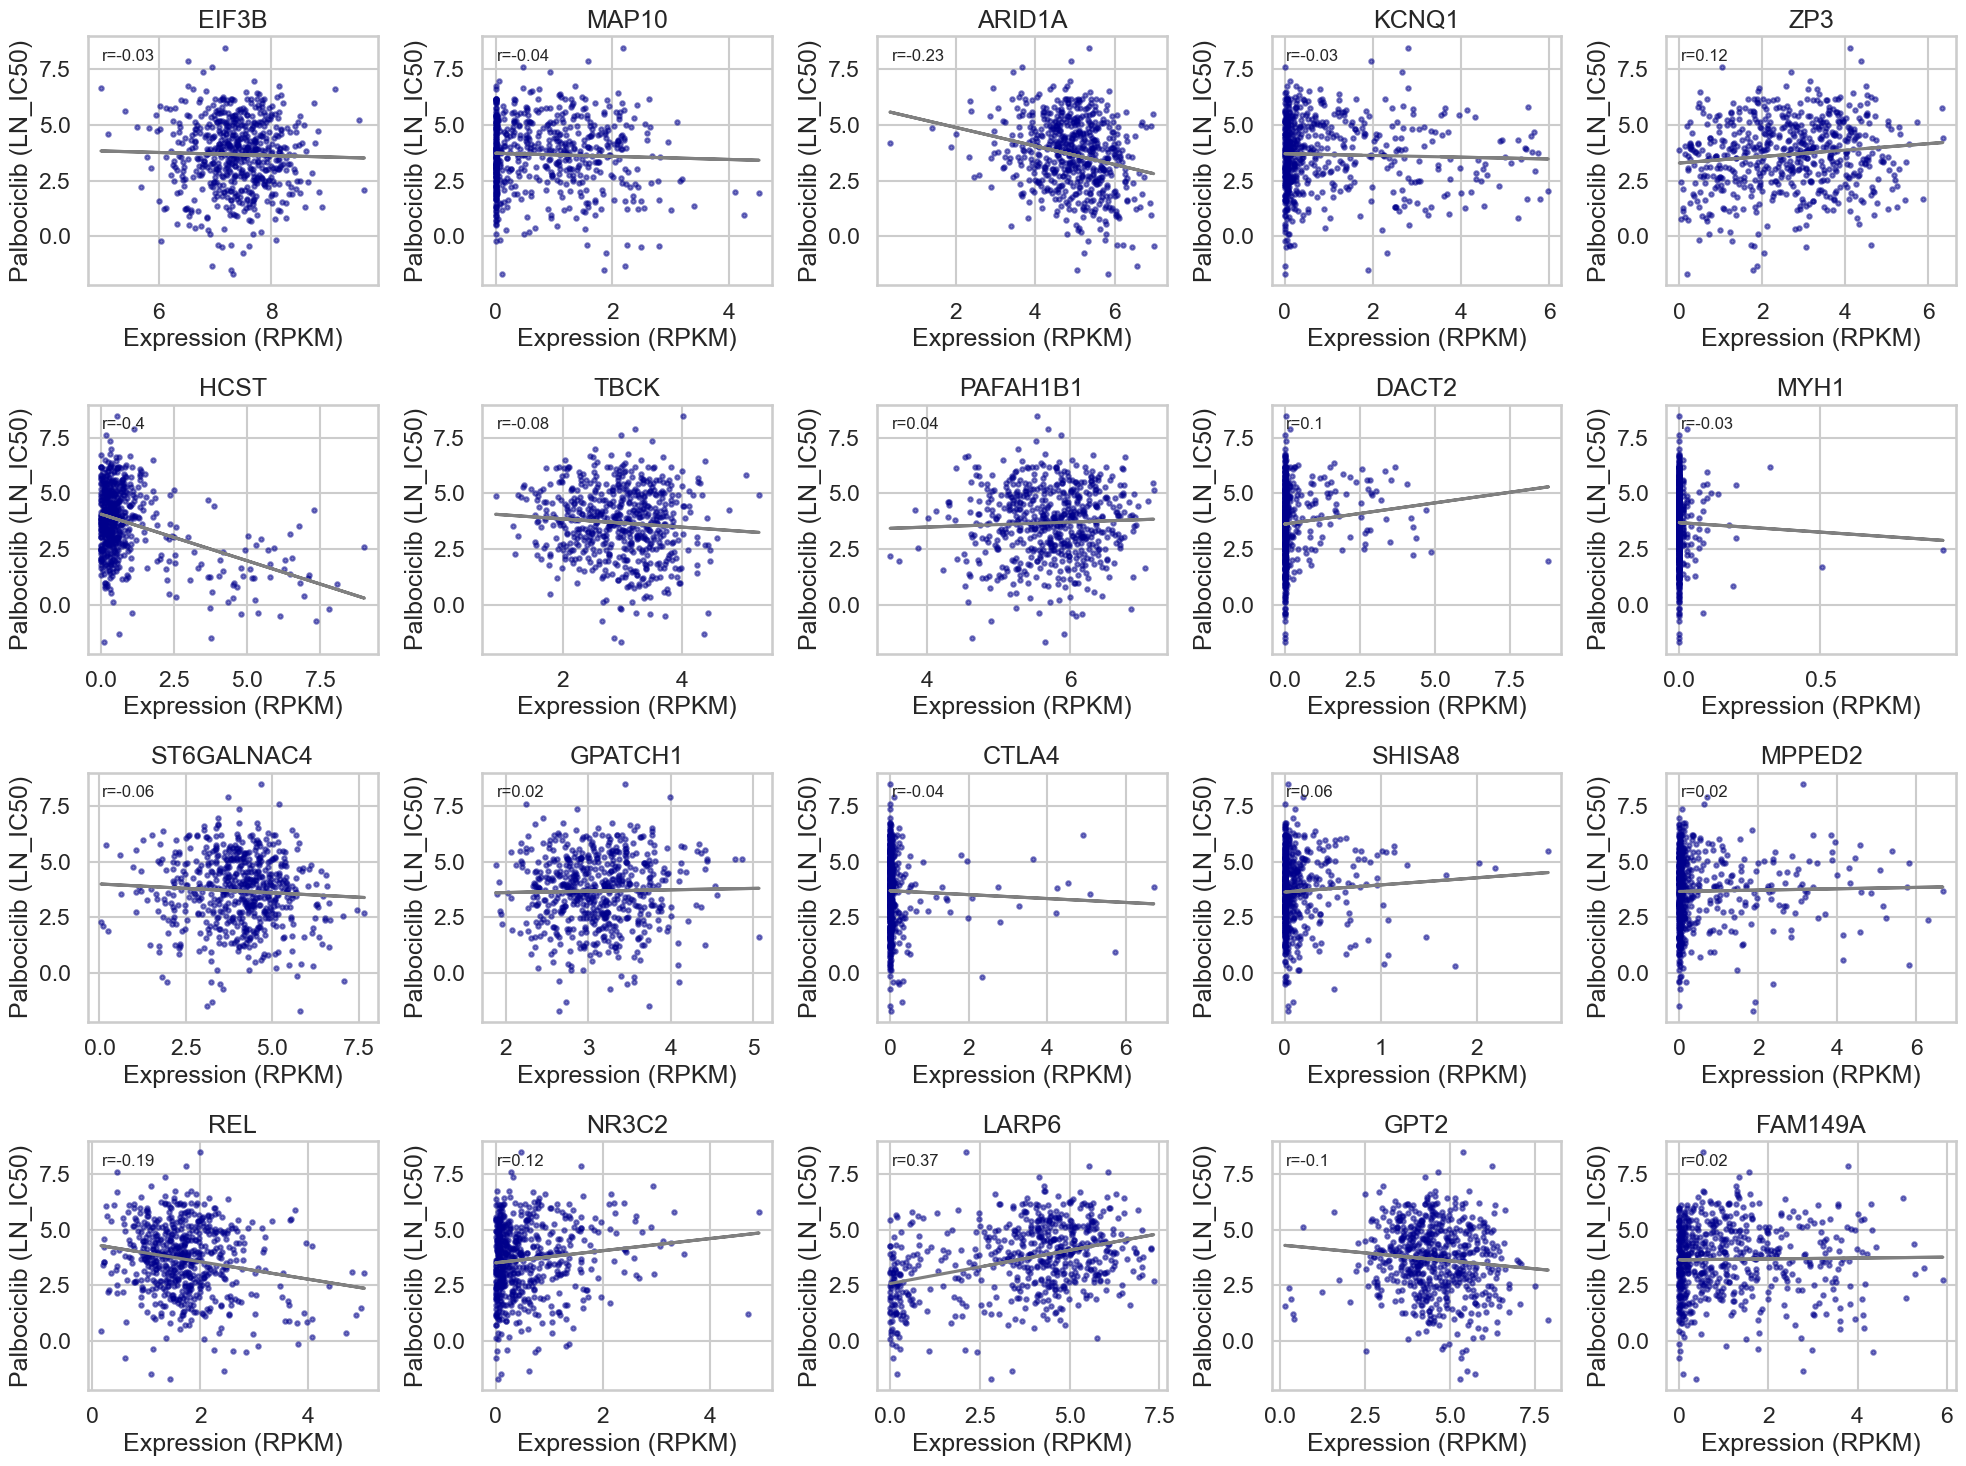

In [22]:
# for 20 random genes, plot correlation between gene expression and drug response

# generate 20 random integers between 0 and len(ccle.columns)
random_cols = np.random.randint(0, len(ccle.columns), 20)

# plot 20 random genes as histograms, 4 rows, 5 columns

fig, axes = plt.subplots(4, 5, figsize=(20, 15))
for i, ax in enumerate(axes.flatten()):
    # create a joint dataframe of gene expression and drug response for palbociclib
    gene = ccle.columns[random_cols[i]]
    # plot correlation between gene expression and palbociclib response
    ax.scatter(palbociclib_df[gene], palbociclib_df['LN_IC50'], color='darkblue', alpha=0.5, s=10)
    # create line of best fit
    m, b = np.polyfit(palbociclib_df[gene], palbociclib_df['LN_IC50'], 1)
    ax.plot(palbociclib_df[gene], m*palbociclib_df[gene] + b, color='grey')
    # get correlation coefficient 
    corr = str(round(np.corrcoef(palbociclib_df[gene], palbociclib_df['LN_IC50'])[0, 1], 2))
    # insert correlation coefficient into text
    ax.text(0.05, 0.95, f'r={corr}', transform=ax.transAxes, fontsize=12, verticalalignment='top')
    ax.set_title(f'{gene}')
    ax.set_xlabel('Expression (RPKM)')
    ax.set_ylabel('Palbociclib (LN_IC50)')
plt.tight_layout()
plt.show()

In [12]:
feature_data, label_data = dd.create_feature_and_label(palbociclib_df)

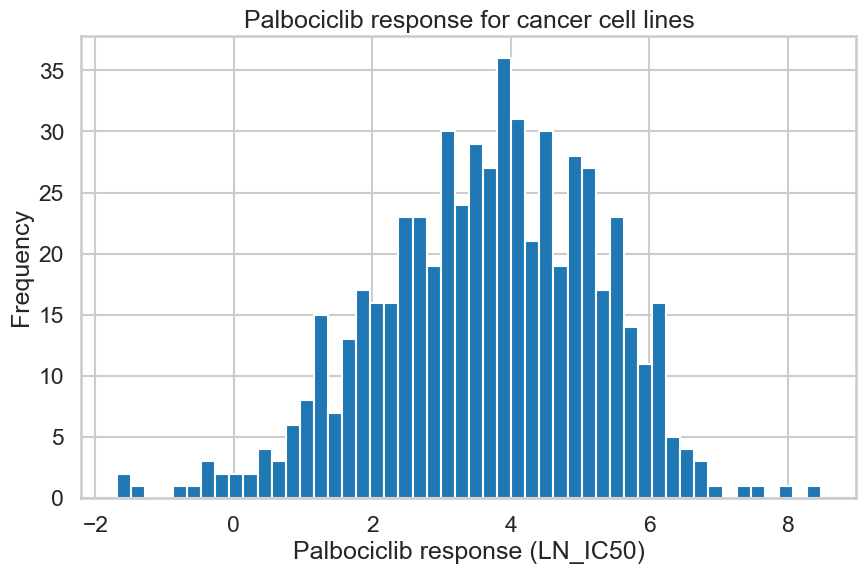

In [14]:
# histogram of label data

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(10, 6))
plt.hist(label_data, bins=50)
plt.xlabel('Palbociclib response (LN_IC50)')
plt.ylabel('Frequency')
plt.title('Palbociclib response for cancer cell lines')
plt.show()

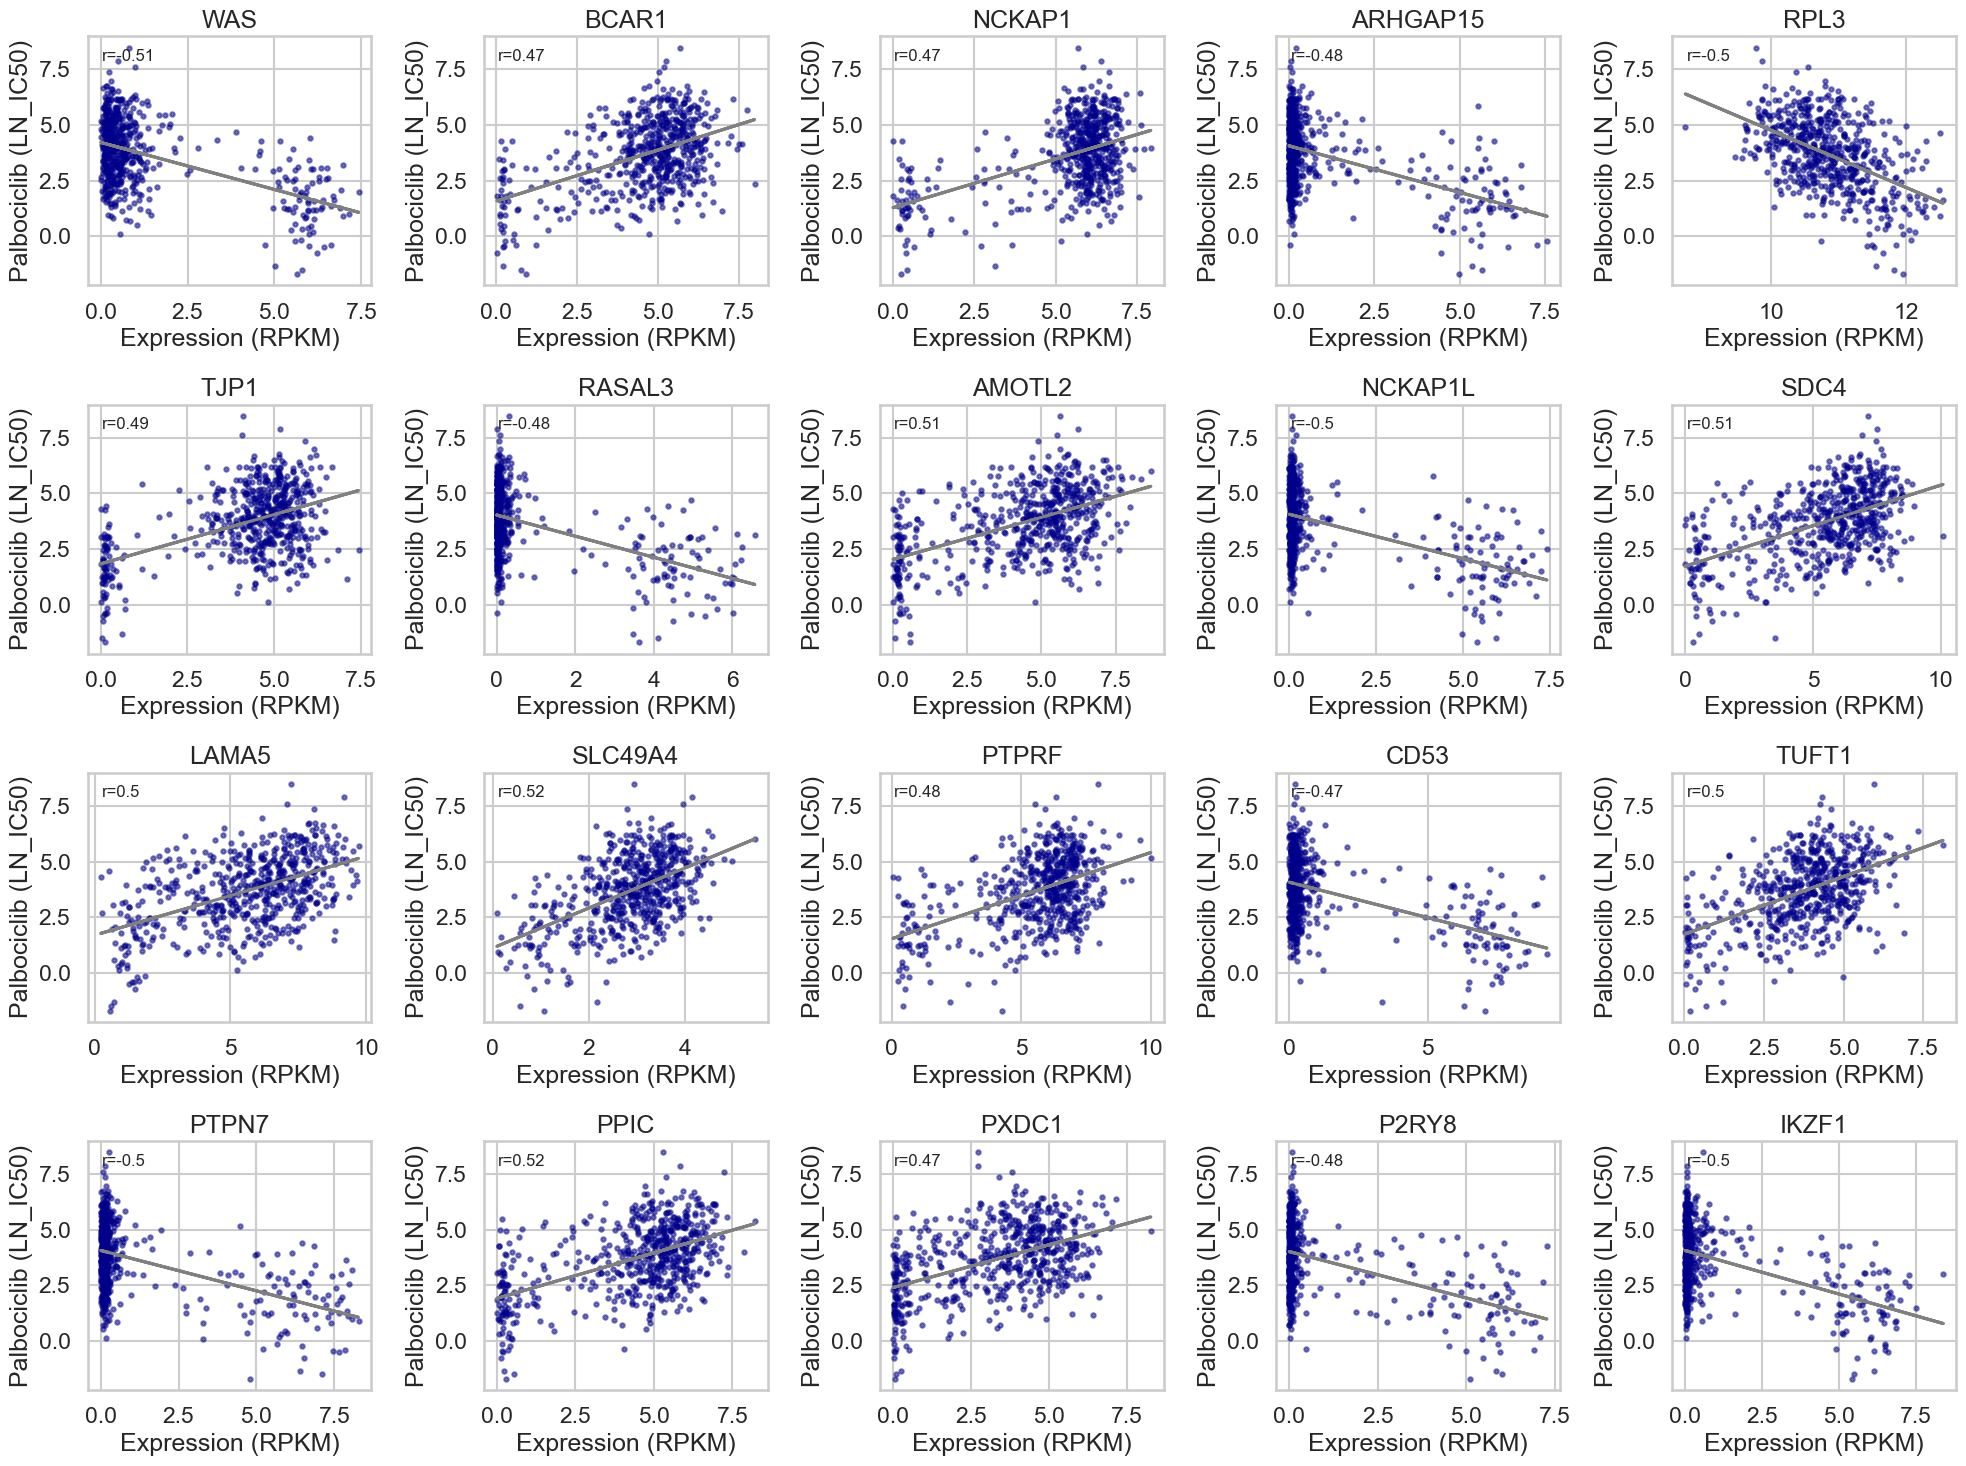

In [28]:
# using f-regression, select the top 20 features

from sklearn.feature_selection import SelectKBest, f_regression

# select the top 20 features
selector = SelectKBest(f_regression, k=20)
selector.fit(feature_data, label_data)

# get the names of the top 20 features return index = true
top_20_features = feature_data.columns[selector.get_support(indices=True)]

fig, axes = plt.subplots(4, 5, figsize=(20, 15))
for i, ax in enumerate(axes.flatten()):
    # create a joint dataframe of gene expression and drug response for palbociclib
    # print(top_20_features[i])
    gene = top_20_features[i]
    # plot correlation between gene expression and palbociclib response
    ax.scatter(palbociclib_df[gene], palbociclib_df['LN_IC50'], color='darkblue', alpha=0.5, s=10)
    # create line of best fit
    m, b = np.polyfit(palbociclib_df[gene], palbociclib_df['LN_IC50'], 1)
    ax.plot(palbociclib_df[gene], m*palbociclib_df[gene] + b, color='grey')
    # get correlation coefficient 
    corr = str(round(np.corrcoef(palbociclib_df[gene], palbociclib_df['LN_IC50'])[0, 1], 2))
    # insert correlation coefficient into text
    ax.text(0.05, 0.95, f'r={corr}', transform=ax.transAxes, fontsize=12, verticalalignment='top')
    ax.set_title(f'{gene}')
    ax.set_xlabel('Expression (RPKM)')
    ax.set_ylabel('Palbociclib (LN_IC50)')
plt.tight_layout()
plt.show()


# Goncalves Proteomics Dataset